In [ ]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
cd /content/

/content


In [ ]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset",force = True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: heydan98
Your Kaggle Key: ··········


100%|██████████| 219M/219M [00:01<00:00, 176MB/s]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import cv2
import os
import PIL
import pathlib
from sklearn.metrics import classification_report, confusion_matrix


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [ ]:
cd rice-image-dataset/

/content/rice-image-dataset


In [ ]:
ls

Rice_Image_Dataset/


In [ ]:
cd Rice_Image_Dataset/

/content/rice-image-dataset/Rice_Image_Dataset


In [ ]:
ls

Arborio/  Basmati/  Ipsala/  Jasmine/  Karacadag/  Rice_Citation_Request.txt


In [ ]:
import os

os.remove("Rice_Citation_Request.txt")

In [ ]:
ls

Arborio/  Basmati/  Ipsala/  Jasmine/  Karacadag/


In [ ]:
import shutil

shutil.rmtree('Ipsala')
shutil.rmtree('Jasmine')
shutil.rmtree('Karacadag')    

In [ ]:
import cv2
from pathlib import Path
rice_dataset_folder = './'
classnames = []
for path in Path(rice_dataset_folder).iterdir():
    if path.is_dir():
        classnames.append(str(path).split('/')[-1])
print(classnames)
X = []
y = []
for i in range(len(classnames)):
  print(classnames[i])
  images = list(Path(rice_dataset_folder+classnames[i]).glob('*'))
  for image in range(int(0.4*len(images))):
    img = cv2.imread(str(images[image]))
    img = cv2.resize(img, (128, 128))
    img = img.astype('float32')
    img = img/255
    X.append(img)
    y.append(i)

['Arborio', 'Basmati']
Arborio
Basmati


In [ ]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(12000, 128, 128, 3)
(12000,)


In [ ]:
from keras.utils import to_categorical
y = to_categorical(y)
print(y.shape)

(12000, 2)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from keras import models, layers
from keras.layers import Flatten, Dense, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils 
model = models.Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3),padding = 'same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding = 'same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding = 'same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten(input_shape=[128, 128, 3]))
model.add(Dense(1000, activation='relu'))
model.add(Dense(3000, activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=2)

Epoch 1/20
75/75 - 17s - loss: 0.4264 - accuracy: 0.9349 - 17s/epoch - 225ms/step
Epoch 2/20
75/75 - 6s - loss: 0.0357 - accuracy: 0.9918 - 6s/epoch - 82ms/step
Epoch 3/20
75/75 - 6s - loss: 0.0171 - accuracy: 0.9957 - 6s/epoch - 82ms/step
Epoch 4/20
75/75 - 6s - loss: 0.0497 - accuracy: 0.9968 - 6s/epoch - 82ms/step
Epoch 5/20
75/75 - 6s - loss: 0.0255 - accuracy: 0.9971 - 6s/epoch - 82ms/step
Epoch 6/20
75/75 - 6s - loss: 0.0367 - accuracy: 0.9955 - 6s/epoch - 83ms/step
Epoch 7/20
75/75 - 6s - loss: 3.4471e-05 - accuracy: 1.0000 - 6s/epoch - 83ms/step
Epoch 8/20
75/75 - 6s - loss: 3.8021e-08 - accuracy: 1.0000 - 6s/epoch - 84ms/step
Epoch 9/20
75/75 - 6s - loss: 0.1000 - accuracy: 0.9953 - 6s/epoch - 83ms/step
Epoch 10/20
75/75 - 6s - loss: 3.3715e-06 - accuracy: 1.0000 - 6s/epoch - 83ms/step
Epoch 11/20
75/75 - 6s - loss: 0.0891 - accuracy: 0.9937 - 6s/epoch - 83ms/step
Epoch 12/20
75/75 - 6s - loss: 0.0216 - accuracy: 0.9971 - 6s/epoch - 83ms/step
Epoch 13/20
75/75 - 6s - loss: 0.0

In [ ]:
model.evaluate(X_test, y_test)

75/75 [==============================] - 1s 10ms/step - loss: 3.0782e-04 - accuracy: 0.9996


[0.0003078161971643567, 0.9995833039283752]

(128, 128, 3)
1/1 [==============================] - 0s 187ms/step
Pred:  Basmati
True label:  Basmati


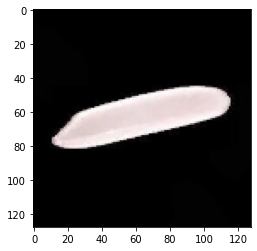

In [ ]:
# n = 0
n=5
print(X_test[n].shape)
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape(1, 128, 128, 3))
print('Pred: ', classnames[pred.argmax()])
print('True label: ', classnames[y_test[n].argmax()])